# Solving 2D Poisson using fenics
- Tutorial [link](https://fenicsproject.org/pub/tutorial/pdf/fenics-tutorial-vol1.pdf)

In [1]:
import fenics as fe

### Create mesh
- Mesh are $8 \times 8$ squares, each square divided into two triangles.
- `UnitSquareMesh` meshes the $[0, 1] \times [0, 1]$ square.

In [2]:
mesh = fe.UnitSquareMesh(8, 8)

### Create function space on mesh
- Finite elements approximate solution with polynomials.
- These polynomials are the function space.
- Type $P_1$ is standard linear triangle.

In [3]:
V = fe.FunctionSpace(mesh, 'P', 1)

### Boundary conditions
- We use Dirichlet, _ie_ values at boundary are provided.
- Values are $u_D = 1+x^2 + 2 y^2$.
- Boundaries are set onto square because of $V$.

In [12]:
# formula must be written in C++ syntax
u_D = fe.Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)
g = fe.Expression('4*x[1]', degree=1)

tol = 1e-14
def boundary_D(x, on_boundary):
    return on_boundary and (fe.near(x[0], 0, tol) or fe.near(x[0], 1, tol))

bc = fe.DirichletBC(V, u_D, boundary_D)

### Variational problem 
- PDE problem are casted into variational problems.

In [9]:
u = fe.TrialFunction(V)
v = fe.TestFunction(V)
f = fe.Constant(-6.0)
a = fe.dot(fe.grad(u), fe.grad(v)) * fe.dx
L = f * v * fe.dx -  g * v * fe.ds
# L = f * v * fe.dx 

***
## Solve and plot

In [10]:
# Compute solution
u = fe.Function(V)
fe.solve(a == L, u, bc)

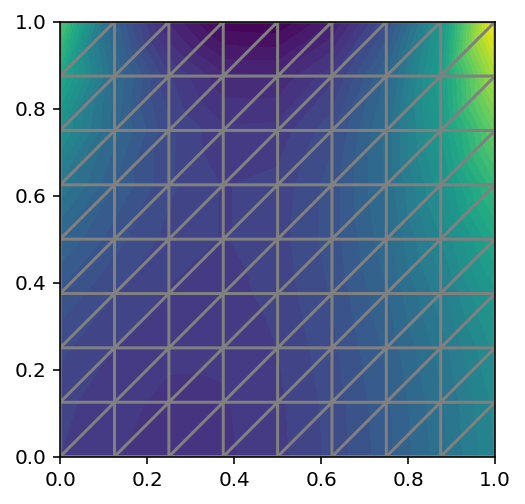

In [11]:
# Plot solution and mesh
fe.plot(u);
fe.plot(mesh);

In [8]:
# Save solution to file in VTK format
vtkfile = fe.File('poisson/solution.pvd')
vtkfile << u